We are working with this astroquery.astrometry_net module! Our goal is to use astrometry.net through python.

https://astroquery.readthedocs.io/en/latest/astrometry_net/astrometry_net.html

In [1]:
from astroquery.astrometry_net import AstrometryNetb

In [36]:
import matplotlib
matplotlib.__version__

'3.0.3'

You will need an account with astrometry.net account. As part of your profile, you're given an "API Key", which lets python connect directly to astrometry.net by giving it a string of letters as a "key" to your account. This string of letters is found in your profile section.

http://nova.astrometry.net/api_help

In [2]:
ast = AstrometryNet()
ast.api_key = "xxxxxxxxxxx"

In [37]:
filename = "../Data/OurRun/0085.rxj0806.3+1527.fits"
!ls $filename

../Data/OurRun/0085.rxj0806.3+1527.fits


In [38]:
wcs_header = ast.solve_from_image(filename)

INFO: first HDU with data is extension 1. [astropy.nddata.ccddata]
Determining background stats


 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


Finding sources
Found 241 sources
 id     xcentroid      ...        flux                 mag         
--- ------------------ ... ------------------ ---------------------
139  545.6099184355702 ... 2503.3152479304167    -8.496288861750816
 17    961.77020825902 ... 1776.3534845283605    -8.123823480611856
  8  593.5668985626673 ... 1571.6340168312242     -7.99087855054383
 95   235.114355832718 ...  992.4204731326818    -7.491739287420517
 76  52.72581432037989 ...  913.8885314527892    -7.402233068308388
 60  534.9777575619829 ...  767.2784432862287    -7.212382492134993
115  647.5458750871594 ...  525.7409280948538   -6.8019294686724665
 18 232.73350171903482 ...  493.7037632876951    -6.733666094172236
179  367.5011854391308 ...  433.6390978296722    -6.592821080540441
 45  944.8606772869272 ...  370.5270936144295    -6.422049924695474
...                ... ...                ...                   ...
 75  751.8341375945771 ...  1.104256517017648  -0.10767492756084912
 32  73.370157

It returns a header with the world coordinate system (WCS) parameters added to the frame. The WCS will match the first data it finds, in this case the 1st corner of our total image because our image is split in 4.

In [39]:
wcs_header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        121.394030076 / RA  of reference point                         
CRVAL2  =        15.4130651675 / DEC of reference point                         
CRPIX1  =        584.0153452

In [40]:
type(wcs_header)
wcs_header['NAXIS']=2
wcs_header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    2 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        121.394030076 / RA  of reference point                         
CRVAL2  =        15.4130651675 / DEC of reference point                         
CRPIX1  =        584.0153452

INFO: Query finished. [astroquery.utils.tap.core]


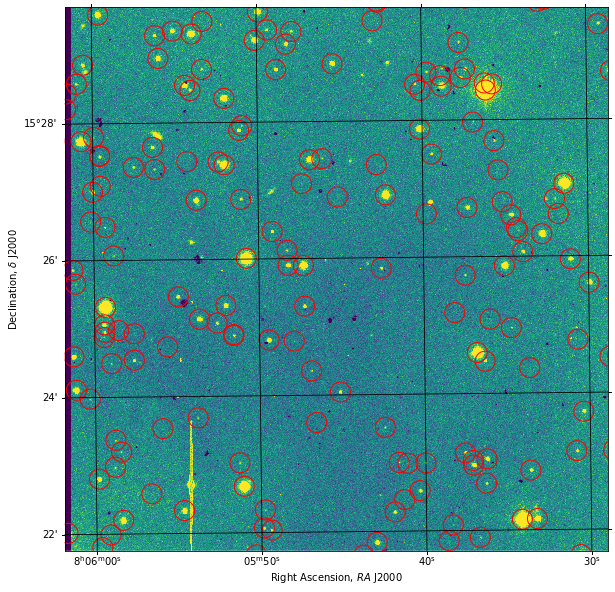

In [46]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
from astropy import wcs

f = fits.open(filename)
data = f[1].data
header = wcs_header #f[0].header

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

w = wcs.WCS(header)

#PLOT SETUP
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=w)
# ax.set_autoscale_on(True)
fig.set_size_inches(10,10)
# fig.set_size_inches(4,4)

width_pix = 705
height_pix = 705
ax.set_xlim(0,width_pix);
ax.set_ylim(0,height_pix);
# ax.invert_yaxis()
# ax.invert_xaxis()
# ax.set_title('DIS Observations Slit and SN Locations, RA vs. DEC')
ax.set_xlabel('Right Ascension, $RA$ J2000')
ax.set_ylabel('Declination, $\delta$ J2000')
ax.grid(color='black')

ax.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma);

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import astroquery
import astropy.units as u

# here we are pulling the center of the image from the header
coord = SkyCoord(ra=header['CRVAL1'], dec=header['CRVAL2'],
                 unit=(u.degree, u.degree), frame='icrs')

# and we query gaia data for 10 arcmin around.
r = Gaia.query_object_async(coordinate=coord, radius= 10 * u.arcmin)

# the result is a whole bunch of ra and dec
radec = np.array( [r["ra"], r["dec"]] ).T
# we turn those into pixel values with the following:
pixels = w.wcs_world2pix(radec, 1)

# which we finally plot as follows:
plt.scatter(pixels.T[0], pixels.T[1], s=400, marker='o', facecolors='none', edgecolors='r');